## Skill Assessment 2


# Name :- Shraddha

In [1]:
import pandas as pd                                     #importing all necesary libraries
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  


In [2]:
df = pd.read_csv("ToyotaCorolla.csv")             #loading Toyota_data

In [4]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


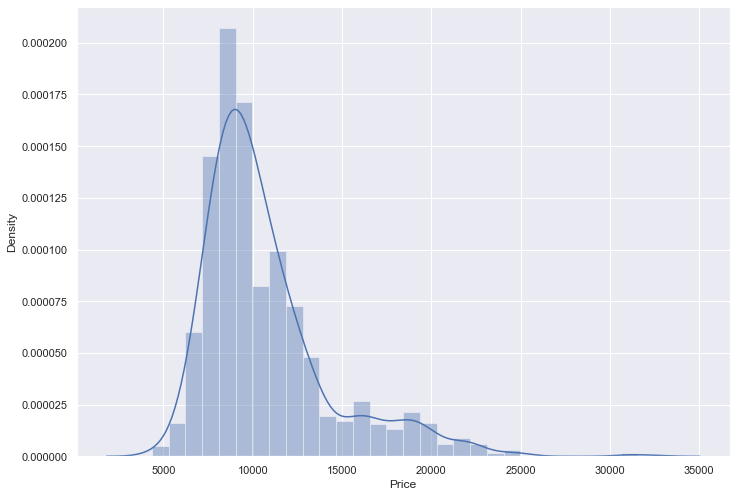

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Price'], bins=30)
plt.show()

<AxesSubplot:>

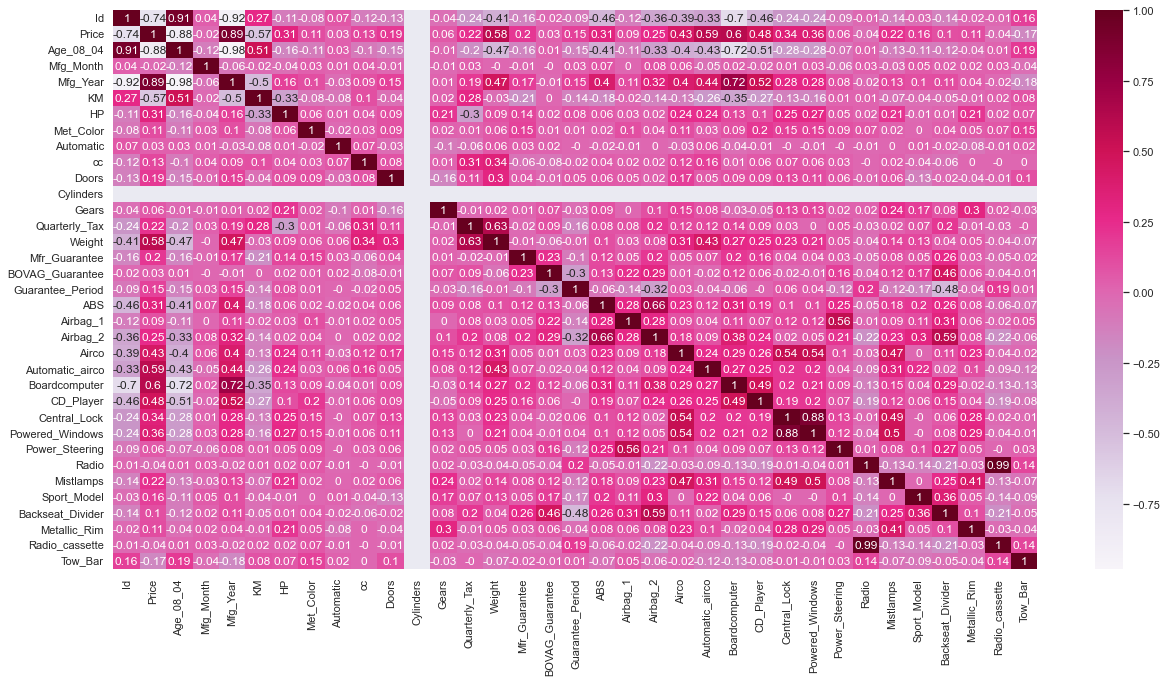

In [10]:
sns.set(rc={'figure.figsize':(20.7,10.27)})
correlation_matrix = df.corr().round(2)                              # annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,cmap="PuRd")

### The correlation bet mfg_year and price is o.89

In [11]:
from sklearn import linear_model

In [12]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [18]:
X = df[['Age_08_04', 'KM'
       , 'HP', 'cc', 'Doors',
       'Gears', 'Quarterly_Tax', 'Weight']]
y = df['Price']

In [19]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [20]:
predictedPrice = regr.predict([[26,50125,92,1794,5,6,1,4128]])

In [21]:
predictedPrice

array([66484.72371824])

In [22]:
print(regr.coef_)

[-1.21658402e+02 -2.08171292e-02  3.16809058e+01 -1.21100301e-01
 -1.61664095e+00  5.94319936e+02  3.94908076e+00  1.69586318e+01]


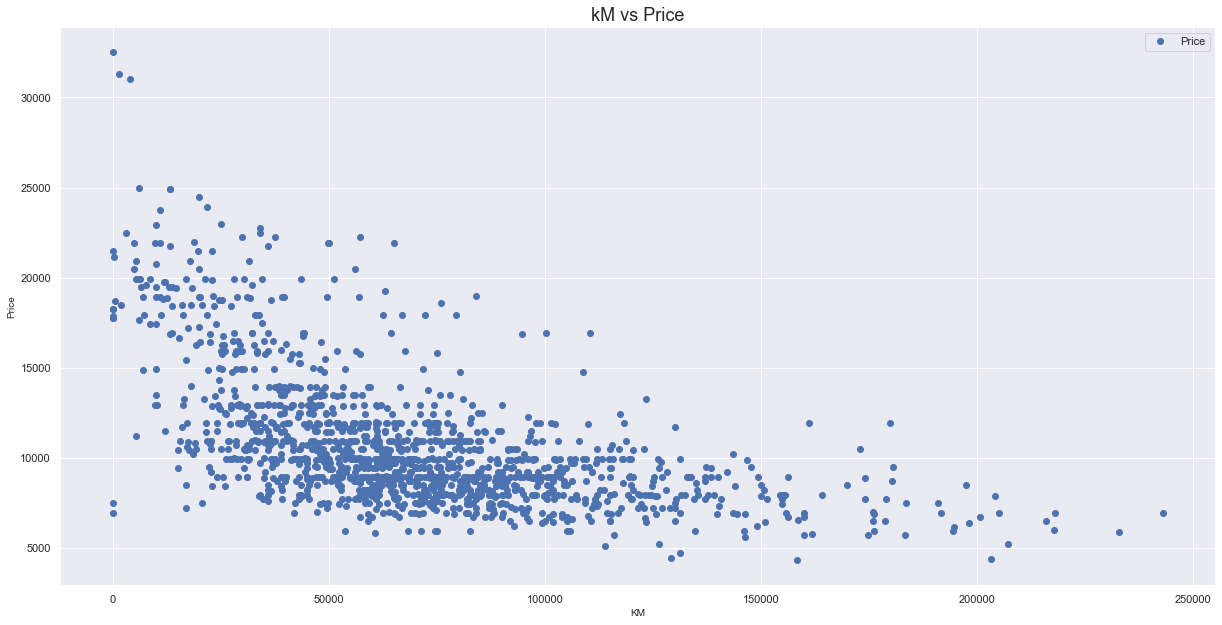

In [27]:
df.plot(x='KM', y='Price', style='o')  
plt.title('kM vs Price', fontsize= 18)    
plt.xlabel('KM',fontsize = 10)  
plt.ylabel('Price',fontsize = 10)  
plt.show()

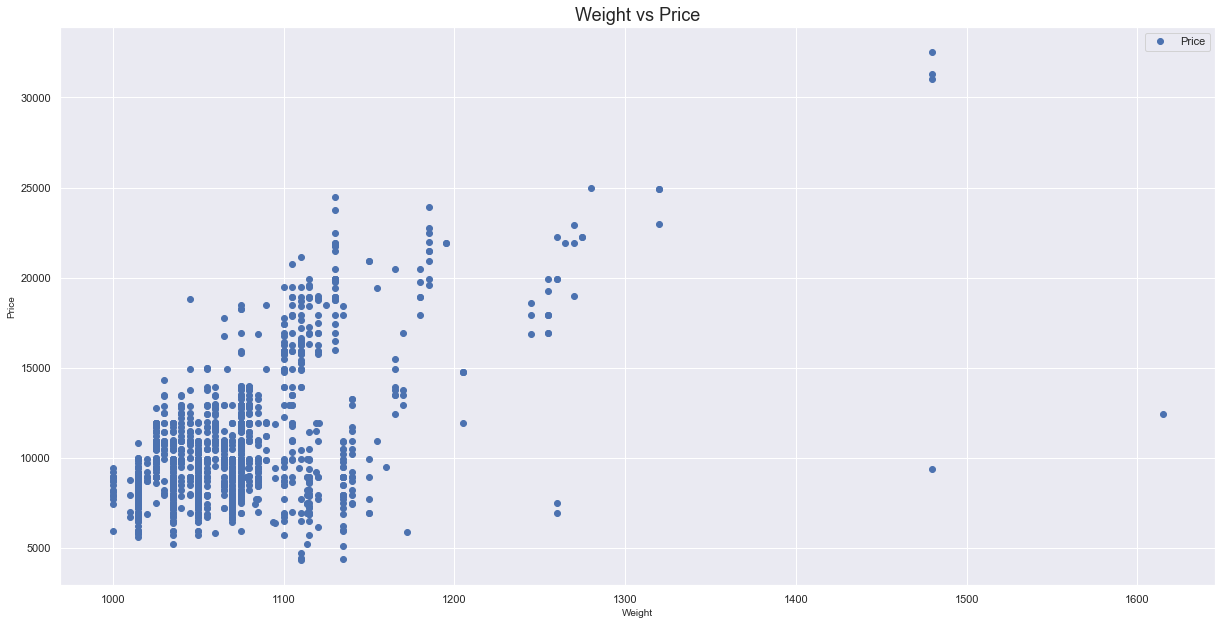

In [31]:
df.plot(x='Weight', y='Price', style='o')  
plt.title('Weight vs Price', fontsize= 18)    
plt.xlabel('Weight',fontsize = 10)  
plt.ylabel('Price',fontsize = 10)  
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 8)
(288, 8)
(1148,)
(288,)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [34]:
from sklearn import metrics                              # model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = metrics.r2_score(y_train, y_train_predict)
rmse

1339.599824209788

In [35]:
r2

0.8713182346005559

In [36]:
y_test_predict = lin_model.predict(X_test)                      # model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = metrics.r2_score(y_test, y_test_predict)
rmse

1338.43791848782

In [37]:
r2

0.8183270798925493

In [38]:
features=['Age_08_04', 'KM'
       , 'HP', 'cc', 'Doors',
       'Gears', 'Quarterly_Tax', 'Weight']

In [39]:
coef2 = pd.Series(lin_model.coef_,features).sort_values()
coef2

Age_08_04       -123.072736
cc                -0.078158
KM                -0.021051
Quarterly_Tax      4.284885
Doors             10.492803
Weight            16.731301
HP                33.951177
Gears            594.917126
dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

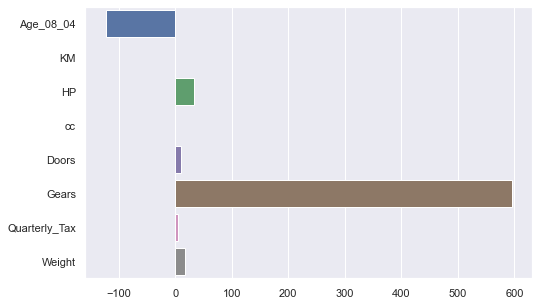

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(lin_model.coef_,features)

### Evaluation Metrics

In [41]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_test_predict)
R2

0.8183270798925493

In [46]:
n=489
k=3                                      #k=No. of independent variables
adj_R2_score = 1 - ((1-R2)*(n-1)/(n-k-1))
print(adj_R2_score)

0.8172033298712661


In [42]:
MAE= metrics.mean_absolute_error(y_test,y_test_predict)
MSE= metrics.mean_squared_error(y_test,y_test_predict)
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 1011.1742342298401
mean squared error: 1791416.0616460086


In [43]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1338.43791848782


In [44]:
RMSLE = np.log(np.sqrt(mean_squared_error(y_test,y_test_predict)))
print("RMSLE",np.log(np.sqrt(mean_squared_error(y_test,y_test_predict))))

RMSLE 7.19925848047857


In [47]:
print("R2 value:",R2)
print("Adjusted R2 value:",adj_R2_score)


R2 value: 0.8183270798925493
Adjusted R2 value: 0.8172033298712661


In [48]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)
print("Root Mean Squared Error:",rmse)
print("Root Mean Squared Log Error:", RMSLE)

mean absolute error: 1011.1742342298401
mean squared error: 1791416.0616460086
Root Mean Squared Error: 1338.43791848782
Root Mean Squared Log Error: 7.19925848047857
